In [2]:
from firstPaperSim import runSingleRegionMultiInput
from src.dataHandling import loadData, makeVoltageDF,makeRateDF,makeInputDF
from plotting.plotAcrossTime import plotConstantInputAcrossTime,plotVoltageAcrossTime,plotRateAcrossTime
from plotting.plotAcrossInput import plotAverageVoltageAcrossInput,plotStdVoltageAcrossInput,splitFrameAcrossInput
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
runSingleRegionMultiInput(saveName='multiInput0_2_15.pkl',
                          eulerTimeEnd=2500,
                          inputAmplitudes=[0,2,15])
runSingleRegionMultiInput(inputAmplitudes=np.linspace(0,20,21),
                          saveName='multiInputMany.pkl',
                          eulerTimeEnd=20000,divisions=200000)

In [ ]:
threeStimDataset = loadData("./singleRegion/data/multiInput0_2_15.pkl.pkl")
manyStimDataset = loadData("./singleRegion/data/multiInputMany.pkl.pkl")
plotColorMapping = {'I':'red','E':'blue','eNoise':'green','eInput':'black'}


NameError: name 'loadData' is not defined

            eNoise    iNoise  eInput  iInput  eTotalInput  iTotalInput
0.000000  0.000000  0.000000     0.0     0.0     0.000000     0.000000
0.000013  0.003274 -0.002038     0.0     0.0     0.003274    -0.002038
0.000025  0.002218 -0.001613     0.0     0.0     0.002218    -0.001613
0.000038  0.003255 -0.004911     0.0     0.0     0.003255    -0.004911
0.000050  0.008305 -0.007281     0.0     0.0     0.008305    -0.007281
...            ...       ...     ...     ...          ...          ...
7.499950  0.306024  0.027141    15.0    15.0    15.306024    15.027141
7.499962  0.311066  0.027646    15.0    15.0    15.311066    15.027646
7.499975  0.310690  0.026477    15.0    15.0    15.310690    15.026477
7.499987  0.301883  0.027507    15.0    15.0    15.301883    15.027507
7.500000  0.300848  0.026665    15.0    15.0    15.300848    15.026665

[600000 rows x 6 columns]


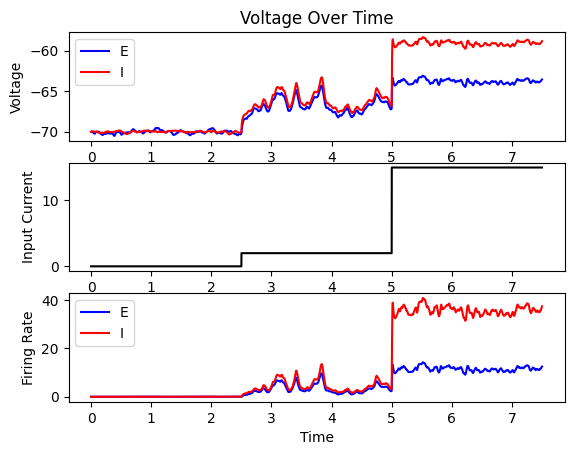

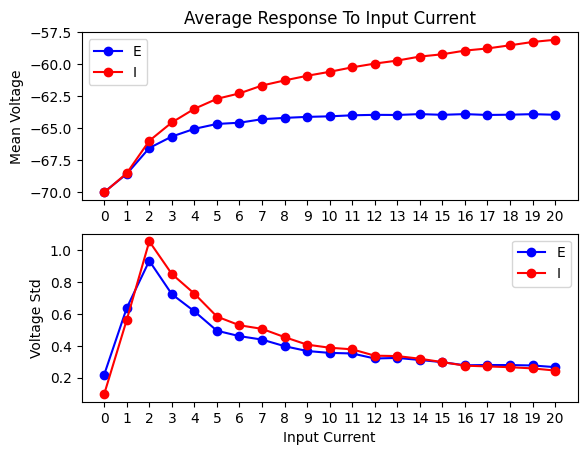

In [ ]:
threeStimVoltage = makeVoltageDF(threeStimDataset)
threeStimRate = makeRateDF(threeStimDataset)
threeStimInput = makeInputDF(threeStimDataset)
#makes the first figure
fig,axs = plt.subplots(3,1)
plotVoltageAcrossTime(threeStimVoltage,axs[0],plotColorMapping,xlabel="")
plotConstantInputAcrossTime(threeStimInput,'eInput',axs[1],plotColorMapping,xlabel="",title='')
plotRateAcrossTime(threeStimRate,axs[2],plotColorMapping,xlabel="Time",title='')
plt.savefig("./singleRegion/figs/threeStepVoltage.png")
manyStimVoltage = makeVoltageDF(manyStimDataset)
manyStimRate = makeRateDF(manyStimDataset)
manyStimInput = makeInputDF(manyStimDataset)
#makes the second figure
fig,axs = plt.subplots(2,1)
plotAverageVoltageAcrossInput(manyStimVoltage,manyStimInput,axs[0],plotColorMapping,'eInput',xlabel="",title='Average Response To Input Current')
plotStdVoltageAcrossInput(manyStimVoltage,manyStimInput,axs[1],plotColorMapping,'eInput',xlabel='Input Current',title='')
plt.savefig("./singleRegion/figs/manyStepVariablility.png")
